# Stroke Prediction Project 

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.
Dataset obtained from Kaggle published by fedesoriano


### Step 1: Importing the libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Step 2: Read the file and conduct basic analysis and noting down the inferences

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data[data['id'].duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [5]:
data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [7]:
data['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [8]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data['age'].isna().sum()

0

In [10]:
data['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [11]:
data['age'].fillna(0.0).astype(int).unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        0, 41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

In [13]:
data['age'].dropna(inplace=True)

In [14]:
data['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [15]:
data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [16]:
data.drop(columns=['id', 'bmi'], axis=1, inplace=True)

In [17]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [18]:
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No': 1})
data['work_type'] = data['work_type'].map({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked':4 })
data['Residence_type'] = data['Residence_type'].map({'Urban': 0, 'Rural': 1})

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,1,1
1,1.0,61.0,0,0,0,1,1,202.21,0,1
2,0.0,80.0,0,1,0,0,1,105.92,0,1
3,1.0,49.0,0,0,0,0,0,171.23,2,1
4,1.0,79.0,1,0,0,1,1,174.12,0,1


<BarContainer object of 5110 artists>

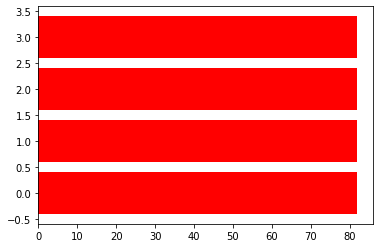

In [22]:
plt.barh(data['smoking_status'], data['age'], color='red')

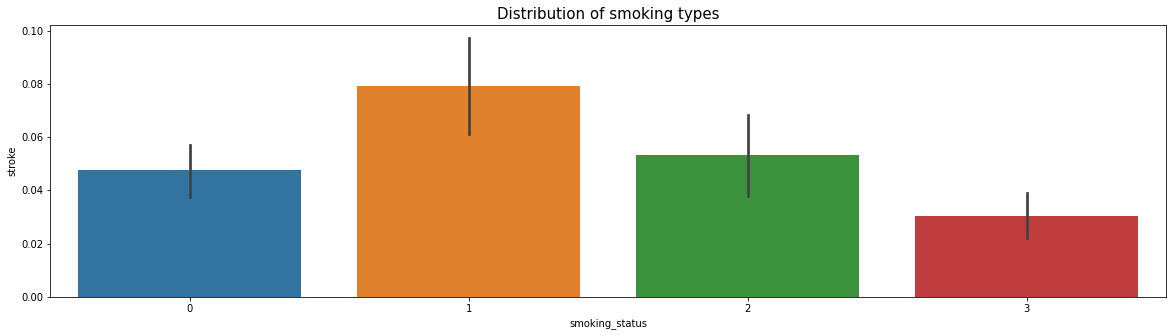

In [24]:
plt.figure(figsize=(20,5))
plt.xlabel('smoking_status')
plt.ylabel('Density')
sns.barplot(data['smoking_status'],data['stroke'])
plt.title('Distribution of smoking types', fontsize=15)
plt.show()
#'never smoked': 0, 
#'formerly smoked': 1, 
#'smokes': 2, 
#'Unknown': 3


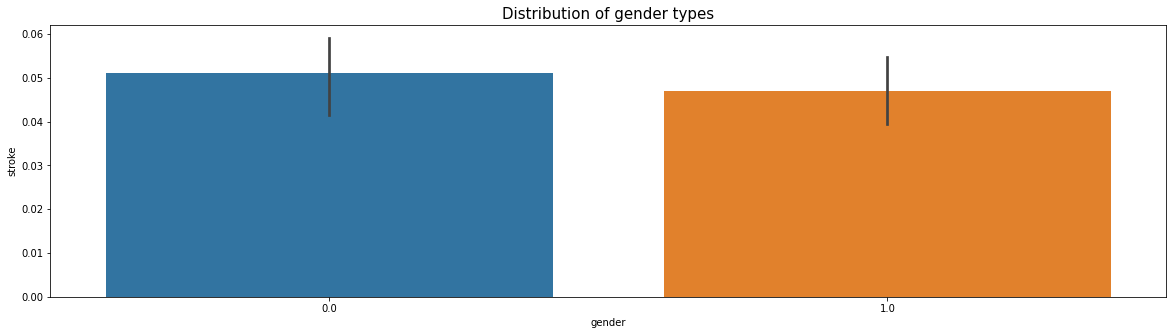

In [25]:
plt.figure(figsize=(20,5))
plt.xlabel('gender')
plt.ylabel('Density')
sns.barplot(data['gender'],data['stroke'])
plt.title('Distribution of gender types', fontsize=15)
plt.show()
#'Male': 0, 
#'Female': 1

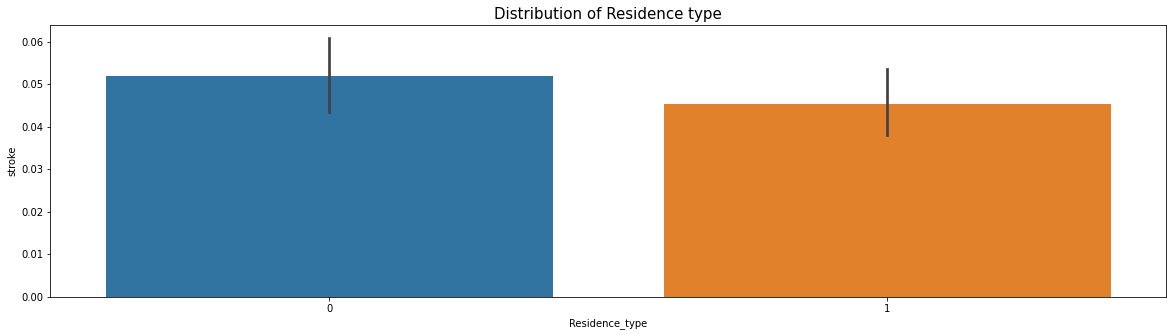

In [26]:
plt.figure(figsize=(20,5))
plt.xlabel('Residence_type')
plt.ylabel('Density')
sns.barplot(data['Residence_type'],data['stroke'])
plt.title('Distribution of Residence type', fontsize=15)
plt.show()
#'Urban': 0, 
#'Rural': 1

<AxesSubplot:>

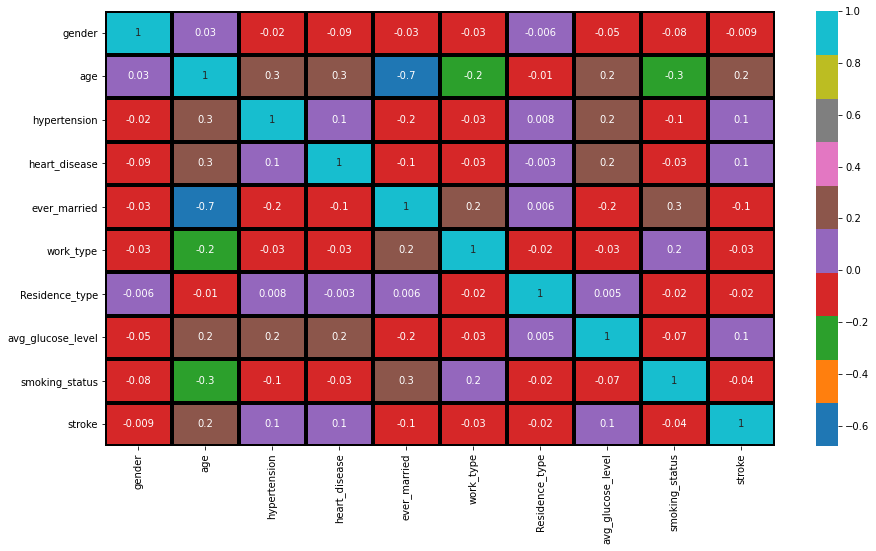

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="tab10",  annot=True, fmt='.1g', linewidths=3, linecolor='black')

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

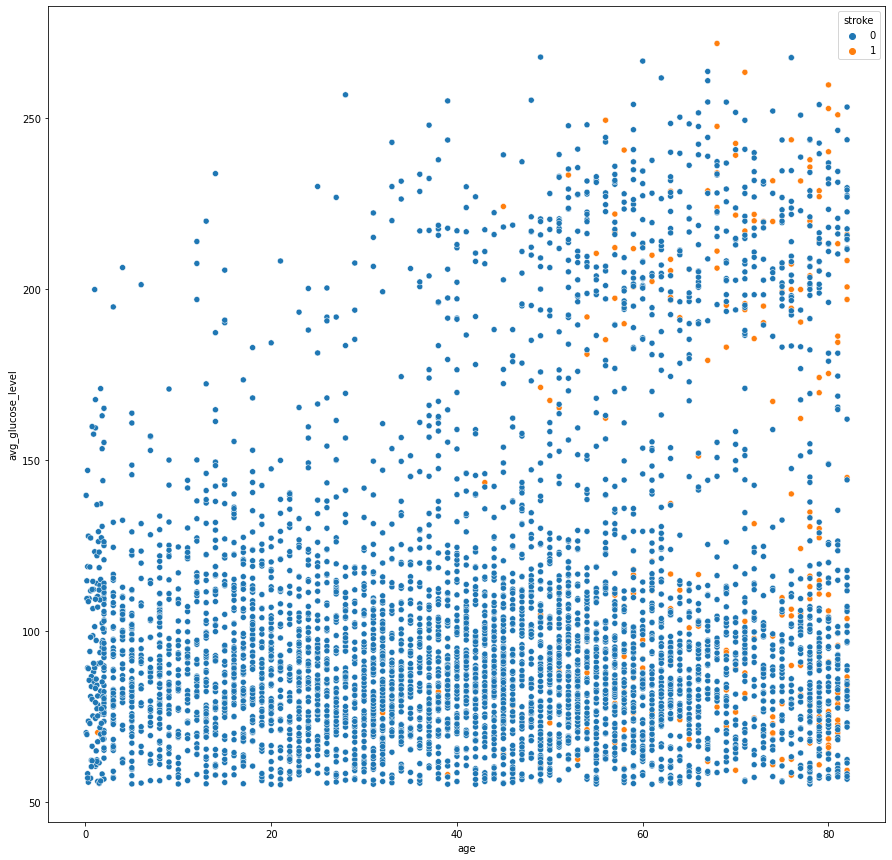

In [44]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data, x="age", y="avg_glucose_level", hue='stroke')




### Step 3: Inferences of Data Analysis

1. Dataset obtained contained 5110 rows of data with 12 columns
2. 'ID' column can be dropped because, keeping that into consideration will be of no use.
3. 'bmi' column is being dropped because, it contained irrelevant values which could have resulted in irrelevant results. One small example of bmi column is, it had a value of 92. In reality, no human alive has reached bmi of 92. Hence, decided to remove it from my analysis.
    1. 'smoking_status' column values are converted into {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}
    2. 'gender' column values are converted into {'Male': 0, 'Female': 1}
    3. 'ever_married' column values are converted into {'Yes':0, 'No': 1}
    4. 'work_type' column values are converted into {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked':4 }
    5. 'Residence_type' column values are converted into {'Urban': 0, 'Rural': 1}
4. Scatterplot of age vs avg_glucose_level keeping hue as stroke has given 2 important inference i.e.,
    1. Stroke is occuring in people who are 30+ years old.
    2. Those who have avg_glucose_level less than 120 have more chance of getting a stroke 
    3. Those who have avg_glucose_level more than 150 have high chance of getting a stroke.
    

### Step 4: Training the data with Decision tree classifier algorithm and predicting the accuracy score.

#### Decision tree classifier model has given the accuracy of 0.90215%. 

In [50]:
data.dropna(inplace=True)

In [51]:
X = data.iloc[:,0:9]
y= data.iloc[:,9:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9021526418786693
